In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: Estimate house price. 

# 2. Data Understanding

## 2.1 Load dataset

In [ ]:
## Read *.xlsx file into pandas DataFrame
FILE_PATH = "houseprice.xlsx"
df = pd.read_excel(FILE_PATH, sheet_name='sheet_name')
df ## Display dataframe

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,207897.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42698,1982,1,1,1,0,591,627,none,0,200,False,False,True,True,562,Gregory Ford,253.0,Lake Jack,10825,88197.0
42699,1983,1,1,1,0,592,624,none,0,204,False,False,True,True,62028,Gregory Ford,3560.0,Lake Jack,10825,102690.0
42700,1983,1,1,1,0,594,618,none,0,197,False,False,True,True,62028,Gregory Ford,3931.0,Lake Jack,10825,98280.0
42701,1981,1,3,2,0,1398,1401,attached,401,0,False,False,True,True,7456,Garcia View,NaN,Lake Jack,10825,98278.0


## 2.2 Summary Statistics

In [18]:
## Understand the type of variable for each column
# df.info() ## Alternatively: df.dtypes

In [19]:
## Check for missing data
# df.isna().sum() ## Alternative: df.isnull().sum()

In [80]:
## Describe data distribution
# df.describe(include="all")

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [ ]:

# Calculate Pearson correlation coefficient
r = df['col_x'].corr(df['col_y'])

# Calculate r^2
r_squared = r ** 2


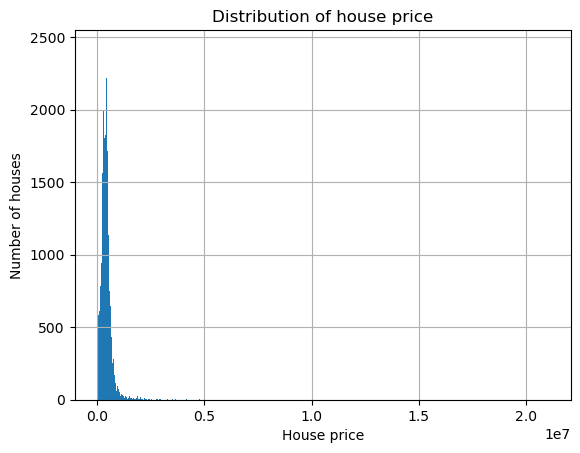

In [22]:
## Understanding distribution of target
col_y = 'sale_price'

## Plot histrogram
df[col_y].hist(bins=1000)
plt.title(f"Distribution of house price")
plt.suptitle('')  # Remove default title by Pandas
plt.xlabel("House price")
plt.ylabel("Number of houses")
plt.show()

### 2.3.1.2 Understanding distribution of features

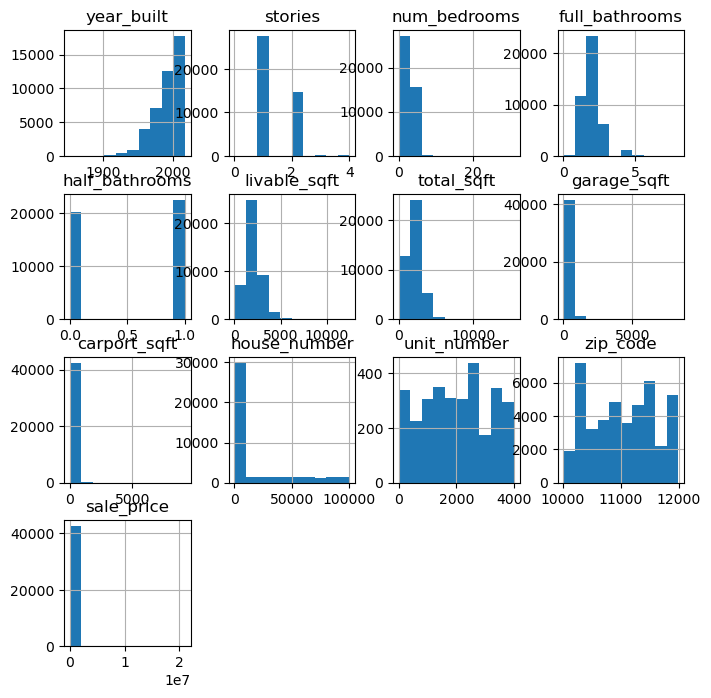

In [16]:
## Plot histogram
df.hist(figsize=(8,8))
plt.show()

In [23]:
## Plot boxplot for different features
# df.boxplot(rot=45, figsize=(4, 2)) ## rot: rotation of label
# plt.show()

### 2.3.2 Understanding relationship between variables

### Side Quest: Curse of Dimensionality

In [82]:
## Sample data
num_sample = 100
col_cod_X = 'total_sqft'
col_cod_y = col_y
col_cod_z = 'garage_sqft'
df_cod = df[(df[col_cod_X]>0) & (df[col_cod_z]>0)]
df_cod_sample = df_cod.sample(num_sample, random_state=2025)
df_cod_sample.tail()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
15160,2005,2,4,3,1,3592,3778,attached,598,0,True,False,True,True,2730,Henry Crescent,NaN,Port Andrealand,11467,467458.0
3945,1987,2,3,2,0,1827,1911,attached,426,0,True,False,True,True,12802,Delgado Lodge,NaN,Coletown,11631,491403.0
31240,1994,2,4,3,0,1397,1441,attached,481,0,True,False,True,True,382,Eric Stream,NaN,Port Andrealand,11295,401941.0
12214,2013,2,4,2,1,3260,3348,attached,623,0,False,False,True,True,4310,William Mission,NaN,Joshuafurt,10321,503372.0
5410,1981,1,3,1,1,1496,2254,attached,481,0,False,True,True,True,45641,Heidi Route,NaN,Lake Christinaport,11203,200341.0


### For tutor to demo only ###

In [ ]:
## Visualize only 2 features
df_cod_sample['dummy_feature'] = 1
col_cod_X = 'total_sqft'
col_cod_y = col_y
col_cod_z = 'dummy_feature'

import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# fig = px.scatter_3d(df_cod_sample, 
#                     x=col_cod_X, 
#                     y=col_cod_y, 
#                     z=col_cod_z,
#                     size=col_cod_z)
# fig.show()



# Fit linear regression with ONE feature (total_sqft)
X = df_cod_sample[[col_cod_X]]
y = df_cod_sample[col_cod_y]
model = LinearRegression().fit(X, y)

# Generate predictions
x_range = np.linspace(df_cod_sample[col_cod_X].min(), df_cod_sample[col_cod_X].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

# Scatter points in 3D
scatter = go.Scatter3d(
    x=df_cod_sample[col_cod_X],
    y=df_cod_sample[col_cod_y],
    z=df_cod_sample[col_cod_z],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Regression line in 3D (flat along Z)
line = go.Scatter3d(
    x=x_range,
    y=y_pred,
    z=[1]*len(x_range),  # constant Z
    mode='lines',
    line=dict(color='red', width=5),
    name='Regression Line'
)

# Combine
fig = go.Figure(data=[scatter, line])
fig.update_layout(
    scene=dict(
        xaxis_title=col_cod_X,
        yaxis_title=col_cod_y,
        zaxis_title=col_cod_z
    ),
    title='3D Scatterplot of 2 Features with Regression Line'
)
fig.show()


e:\anaconda\envs\mldp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [78]:
## Visualize one more additional features (i.e., 3 features)
col_cod_X = 'total_sqft'
col_cod_y = col_y
col_cod_z = 'garage_sqft'

import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Fit linear regression
X = df_cod_sample[[col_cod_X, col_cod_z]]
y = df_cod_sample[col_cod_y]
model = LinearRegression().fit(X, y)

# Create grid for hyperplane
x_range = np.linspace(df_cod_sample[col_cod_X].min(), df_cod_sample[col_cod_X].max(), 30)
z_range = np.linspace(df_cod_sample[col_cod_z].min(), df_cod_sample[col_cod_z].max(), 30)
X_grid, Z_grid = np.meshgrid(x_range, z_range)

# Predict y for grid
Y_pred = model.predict(np.c_[X_grid.ravel(), Z_grid.ravel()]).reshape(X_grid.shape)

# Scatter points
scatter = go.Scatter3d(
    x=df_cod_sample[col_cod_X],
    y=df_cod_sample[col_cod_y],
    z=df_cod_sample[col_cod_z],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Hyperplane surface
surface = go.Surface(x=X_grid, y=Y_pred, z=Z_grid, opacity=0.5, colorscale='Viridis', name='Regression Plane')

# Combine
fig = go.Figure(data=[scatter, surface])
fig.update_layout(scene=dict(xaxis_title=col_cod_X, yaxis_title=col_cod_y, zaxis_title=col_cod_z),
                  title='3D Scatterplot of 3 Features with Regression Plane')
fig.show()

## Notice how spread out the data is
## Some parts of the graph are lacking in data, since # dimensions increased but # rows did not change


e:\anaconda\envs\mldp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
## Visualize whole dataset based on 3 features
col_cod_X = 'total_sqft'
col_cod_y = col_y
col_cod_z = 'garage_sqft'

## Visualize one more additional features (i.e., 3 features)

import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Fit linear regression
X = df_cod[[col_cod_X, col_cod_z]]
y = df_cod[col_cod_y]
model = LinearRegression().fit(X, y)

# Create grid for hyperplane
x_range = np.linspace(df_cod[col_cod_X].min(), df_cod[col_cod_X].max(), 30)
z_range = np.linspace(df_cod[col_cod_z].min(), df_cod[col_cod_z].max(), 30)
X_grid, Z_grid = np.meshgrid(x_range, z_range)

# Predict y for grid
Y_pred = model.predict(np.c_[X_grid.ravel(), Z_grid.ravel()]).reshape(X_grid.shape)

# Scatter points
scatter = go.Scatter3d(
    x=df_cod[col_cod_X],
    y=df_cod[col_cod_y],
    z=df_cod[col_cod_z],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Hyperplane surface
surface = go.Surface(x=X_grid, y=Y_pred, z=Z_grid, opacity=0.5, colorscale='Viridis', name='Regression Plane')

# Combine
fig = go.Figure(data=[scatter, surface])
fig.update_layout(scene=dict(xaxis_title=col_cod_X, yaxis_title=col_cod_y, zaxis_title=col_cod_z),
                  title='3D Scatterplot of 3 Features with Regression Plane')
fig.show()

## Notice how the distribution / spread of data has changed
## Recall the curse of dimensionality: sparser data as # dimensions increases
## Some parts of the graph are lacking in datapoints


e:\anaconda\envs\mldp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

